In [1]:
#importing required libraries and loading the dataset
import pandas as pd
rate=pd.read_csv('/content/exchange_rate.csv')
rate


,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
#setting the date as the index
rate.set_index('date',inplace=True)
rate

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


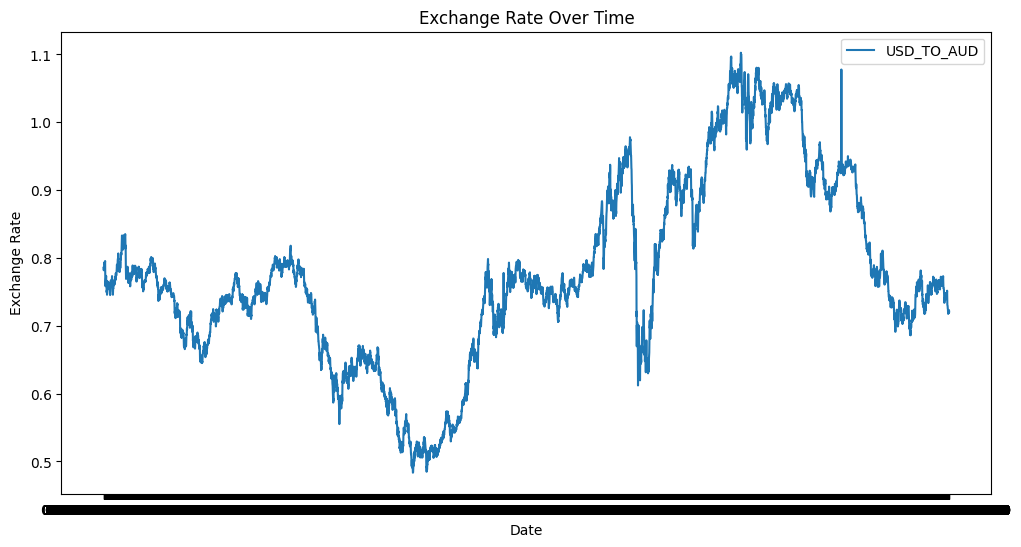

In [6]:
#plotting the data
import matplotlib.pyplot as plt

# Plot the time series for USD to Australian Dollar
plt.figure(figsize=(12, 6))
plt.plot(rate['Ex_rate'], label='USD_TO_AUD')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [7]:
#checing for missing values
rate.isnull().sum()

,0
Ex_rate,0


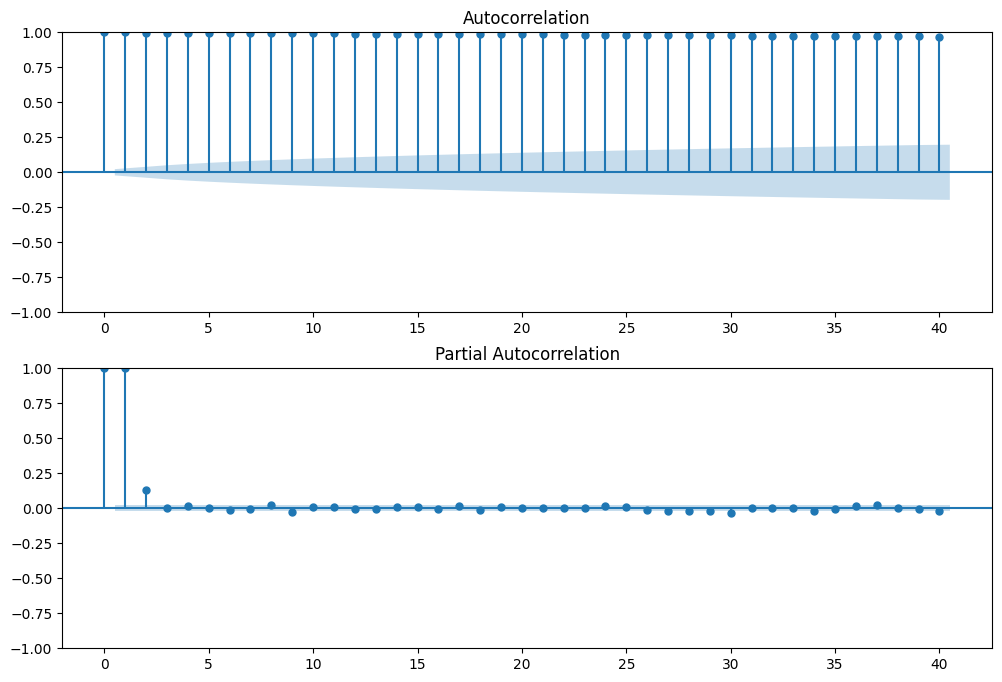

In [9]:
#model building with ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ploting ACF and PACF for the series
fig, ax = plt.subplots(2, figsize=(12, 8))

plot_acf(rate['Ex_rate'], lags=40, ax=ax[0])
plot_pacf(rate['Ex_rate'], lags=40, ax=ax[1])

plt.show()


In [12]:
#building the arima model
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(rate['Ex_rate'])

# Fit the model
model_fit = model.fit()

# Summary of the model
model_fit.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                          ARIMA   Log Likelihood                4337.879
Date:                Sun, 24 Nov 2024   AIC                          -8671.758
Time:                        15:06:32   BIC                          -8657.890
Sample:                             0   HQIC                         -8666.999
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.002    485.265      0.000       0.774       0.780
sigma2         0.0187      0.000     55.195      0.000       0.018       0.019
===================================================================================
Ljung-Box (L1) (Q):                7575.95   Jarque-Bera (JB):               119.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.44   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

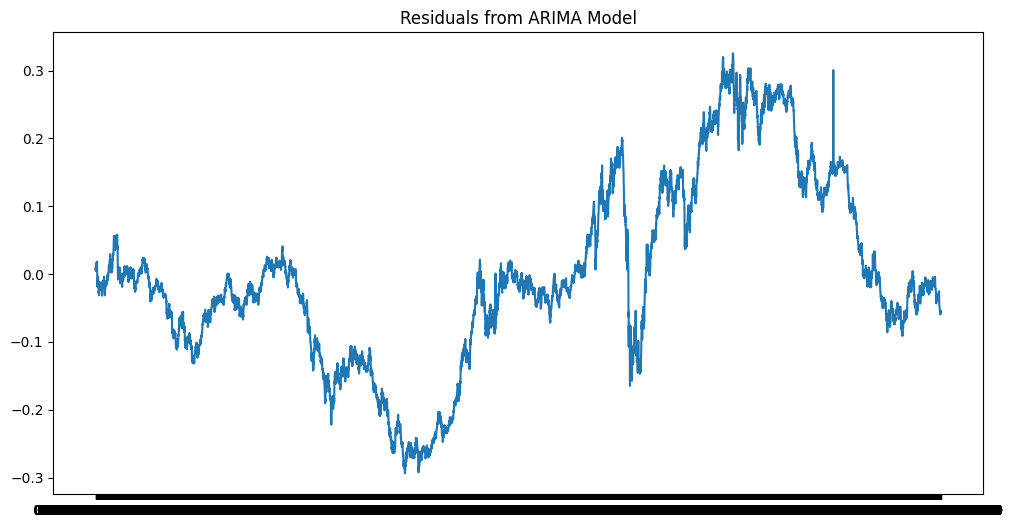

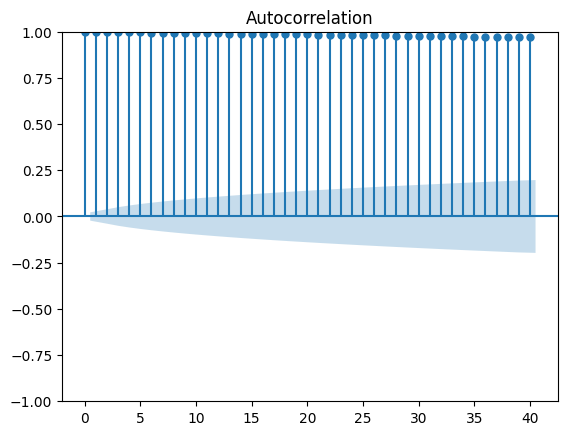

In [13]:
# Ploting the residuals
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

# Plotting ACF of residuals
plot_acf(residuals, lags=40)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


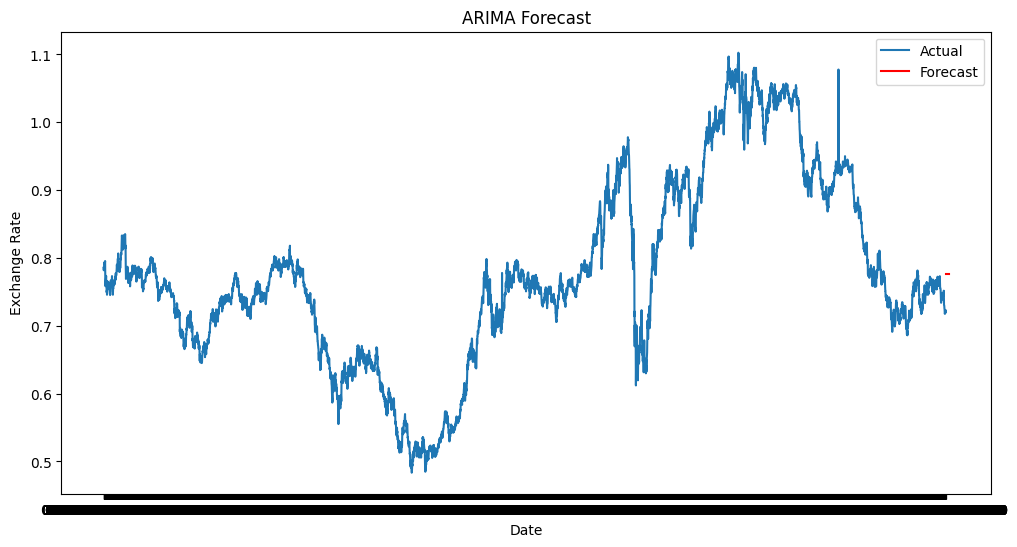

In [15]:
# Forecasting future values
forecast = model_fit.forecast(steps=30)

# Ploting forecast against actual values
plt.figure(figsize=(12, 6))
plt.plot(rate['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [16]:
#building the model with exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
model_hw = ExponentialSmoothing(rate['Ex_rate'], seasonal='add', seasonal_periods=12).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [17]:
model_hw = ExponentialSmoothing(rate['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12).fit(optimized=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


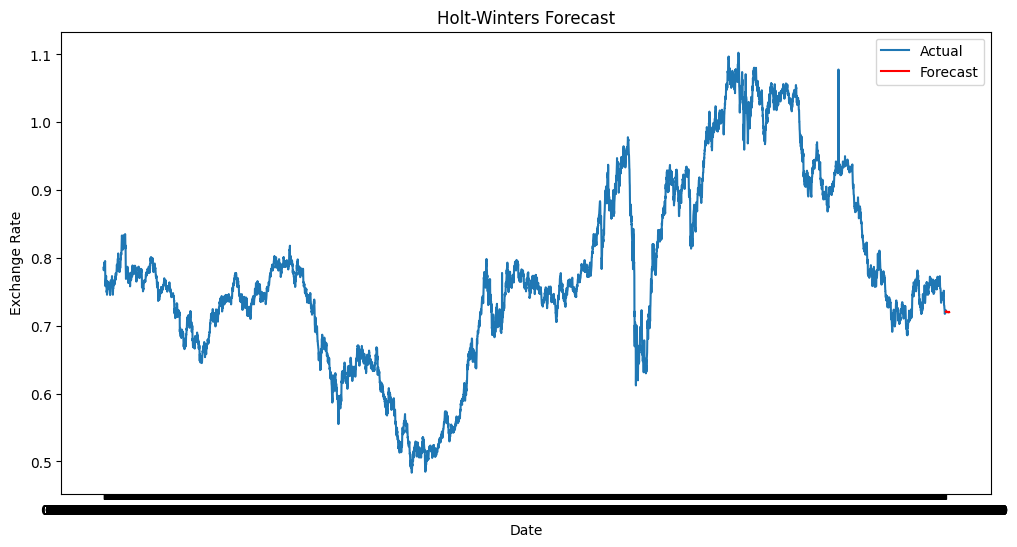

In [18]:
# Forecasting future values
forecast_hw = model_hw.forecast(steps=30)

# Ploting forecast against actual values
plt.figure(figsize=(12, 6))
plt.plot(rate['Ex_rate'], label='Actual')
plt.plot(forecast_hw, label='Forecast', color='red')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Computing metrics for ARIMA
mae_arima = mean_absolute_error(rate['Ex_rate'][-30:], forecast)
rmse_arima = mean_squared_error(rate['Ex_rate'][-30:], forecast, squared=False)

# Computing metrics for Holt-Winters
mae_hw = mean_absolute_error(rate['Ex_rate'][-30:], forecast_hw)
rmse_hw = mean_squared_error(rate['Ex_rate'][-30:], forecast_hw, squared=False)

print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}")
print(f"Holt-Winters - MAE: {mae_hw}, RMSE: {rmse_hw}")


ARIMA - MAE: 0.04423064587289217, RMSE: 0.045857095763540516
Holt-Winters - MAE: 0.013017654522635458, RMSE: 0.017245999955208903


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
# Comparing the performance
if rmse_arima < rmse_hw:
    print("ARIMA performed better with lower RMSE.")
else:
    print("Holt-Winters performed better with lower RMSE.")



Holt-Winters performed better with lower RMSE.
